In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

plt.rcParams.update({'font.size': 20})

# x = x * 2 - растянем по x
# y = y * 0.5 - сожмём по y
# z = 0.1 * x - наклоним от x

N = [[2.0,  0.0],
     [0.0,  0.5]]

M = [[0.866, 0.5],
     [-0.5, 0.866]]

M = np.matrix(M) * np.matrix(N)
# M = np.matrix(M) -- если без поворотов

             U                            Σ                 U_T
[[-0.86601905  0.500011  ]	[[1.999956 0.      ]	[[-1. -0.]
 [ 0.500011    0.86601905]]	 [0.       0.499989]]	 [ 0.  1.]]


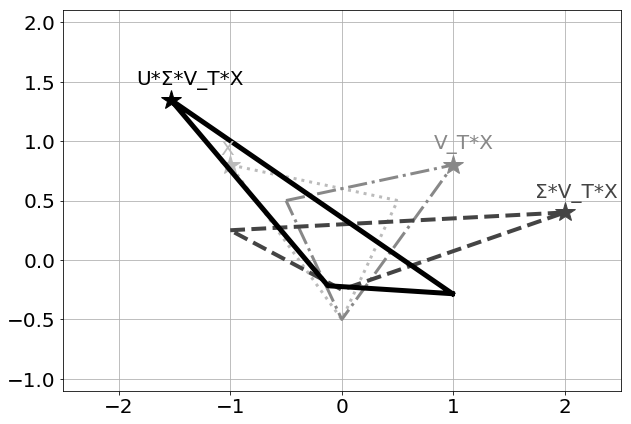

In [4]:
# рассчитаем сингулярное разложение
U, s, V_T = svd(M)

# s - Это вектор диагональных элементов Σ 
# (матрица Σ отвечает за растяжение, поэтому она диагональная)
# Их нужно аккуратно разложить в матрицу Σ
Σ = np.zeros((U.shape[1], V_T.shape[0]), dtype=float)
Σ[:V_T.shape[0], :V_T.shape[0]] = np.diag(s)

# напечатаем матрицы "в рядок"
matrices_side_by_side = '\n'.join(
    map(
        lambda a, b, c: "{}\t{}\t{}".format(a, b, c), str(U).split('\n'), str(Σ).split('\n'), str(V_T).split('\n')))
print(" " * 12, "U", " " * 26, "Σ", " " * 15, "U_T")
print(matrices_side_by_side)

plt.figure(figsize=(10,7))
plt.xlim(-2.5, 2.5)
plt.ylim(-1.1, 2.1)

CLR = "#BBBBBB"
points = np.matrix([[0.5, 0.5], [-1, 0.8], [0, -0.5], [0.5, 0.5]]).T
plt.plot(points[0].A[0], points[1].A[0], color=CLR, linestyle=':', lw=3)
plt.plot(points[0].A[0][1:2], points[1].A[0][1:2], '*', color=CLR, markersize=20)
plt.annotate('X',xy=points[:,1], xytext=(-10, 10), textcoords='offset points', color=CLR)

points = V_T * points
CLR = '#888888'
plt.plot(points[0].A[0], points[1].A[0], color=CLR, linestyle='-.', lw=3)
plt.plot(points[0].A[0][1:2], points[1].A[0][1:2], '*', color=CLR, markersize=20)
plt.annotate('V_T*X',xy=points[:,1], xytext=(-20, 16), textcoords='offset points', color=CLR)

points = Σ * points
CLR = "#444444"
plt.plot(points[0].A[0], points[1].A[0], color=CLR, linestyle='--', lw=4)
plt.plot(points[0].A[0][1:2], points[1].A[0][1:2], '*', color=CLR, markersize=20)
plt.annotate('Σ*V_T*X',xy=points[:,1], xytext=(-30, 15), textcoords='offset points', color=CLR)

points = U * points
CLR = "#000000"
plt.plot(points[0].A[0], points[1].A[0], color=CLR, linestyle='-', lw=5)
plt.plot(points[0].A[0][1:2], points[1].A[0][1:2], '*', color=CLR, markersize=20)
plt.annotate('U*Σ*V_T*X',xy=points[:,1], xytext=(-35, 15), textcoords='offset points', color=CLR)
plt.grid(True)
plt.show()